## Train a simple convnet on the Fashion MNIST dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print(x_test.shape)

(10000, 28, 28)


### Find dimensions of an image in the dataset

In [5]:
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
#Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [10]:
x_train = tf.keras.backend.expand_dims(
    x_train, axis=-1
)

In [11]:
x_test = tf.keras.backend.expand_dims(
    x_test, axis=-1
)

In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [13]:
#Clear any existing model in memory
tf.keras.backend.clear_session()


#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [14]:
#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())


#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())


#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))



#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
history = model.fit(x_train,y_train,
                    epochs=10,
                    verbose=1,
                    callbacks=callback,
                    validation_data=(x_test,y_test),
                    batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4198 - accuracy: 0.8566 - val_loss: 0.3333 - val_accuracy: 0.8803
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2538 - accuracy: 0.9058 - val_loss: 0.3061 - val_accuracy: 0.8934
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1945 - accuracy: 0.9285 - val_loss: 0.3018 - val_accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1515 - accuracy: 0.9444 - val_loss: 0.3368 - val_accuracy: 0.9031
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1212 - accuracy: 0.9564 - val_loss: 0.3641 - val_accuracy: 0.9002
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0940 - accuracy: 0.9663 - val_loss: 0.3795 - val_accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0769 - accuracy: 0.9727 - val_loss: 0.4266 - val_ac

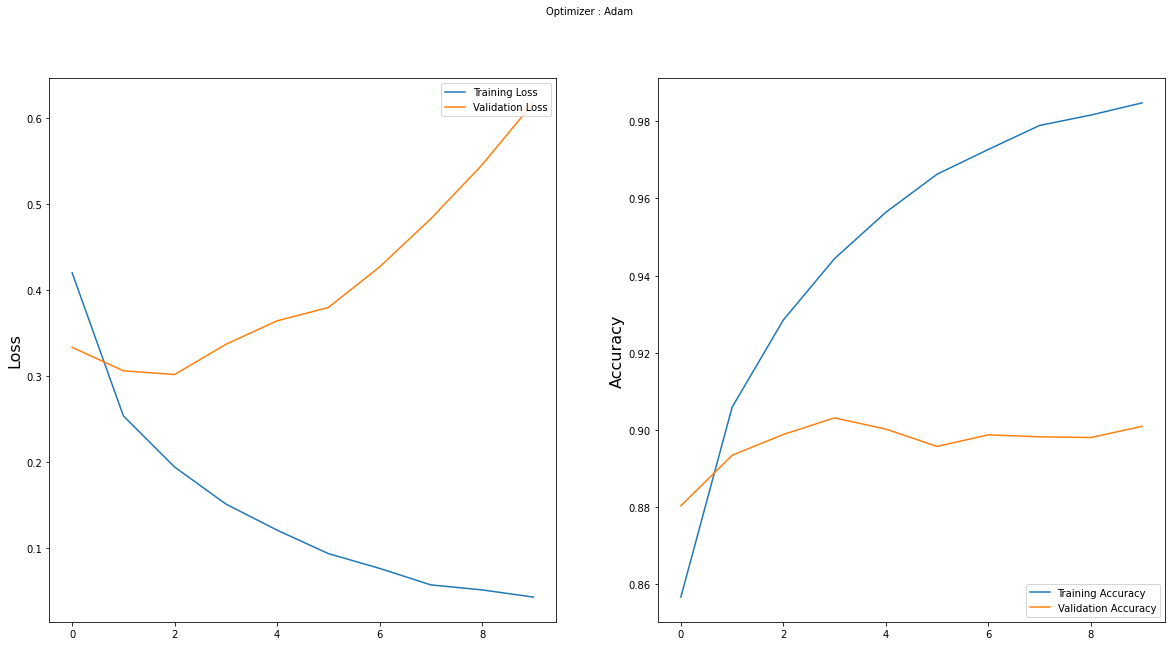

In [18]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [19]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model1 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model1.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model1.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model1.add(tf.keras.layers.BatchNormalization())


#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model1.add(tf.keras.layers.BatchNormalization())

#Add MaxPooling layer
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Flatten the output
model1.add(tf.keras.layers.Flatten())

#Dense layer
model1.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model1.add(tf.keras.layers.Dropout(0.25))

#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0

In [22]:
history1 = model.fit(x_train,y_train,
                    epochs=10,
                    verbose=1,
                    callbacks=callback,
                    validation_data=(x_test,y_test),
                    batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0413 - accuracy: 0.9859 - val_loss: 0.5809 - val_accuracy: 0.9039
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0351 - accuracy: 0.9877 - val_loss: 0.5696 - val_accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.6565 - val_accuracy: 0.9028
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0276 - accuracy: 0.9907 - val_loss: 0.7360 - val_accuracy: 0.9053
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.8035 - val_accuracy: 0.9059
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.7608 - val_accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.6883 - val_ac

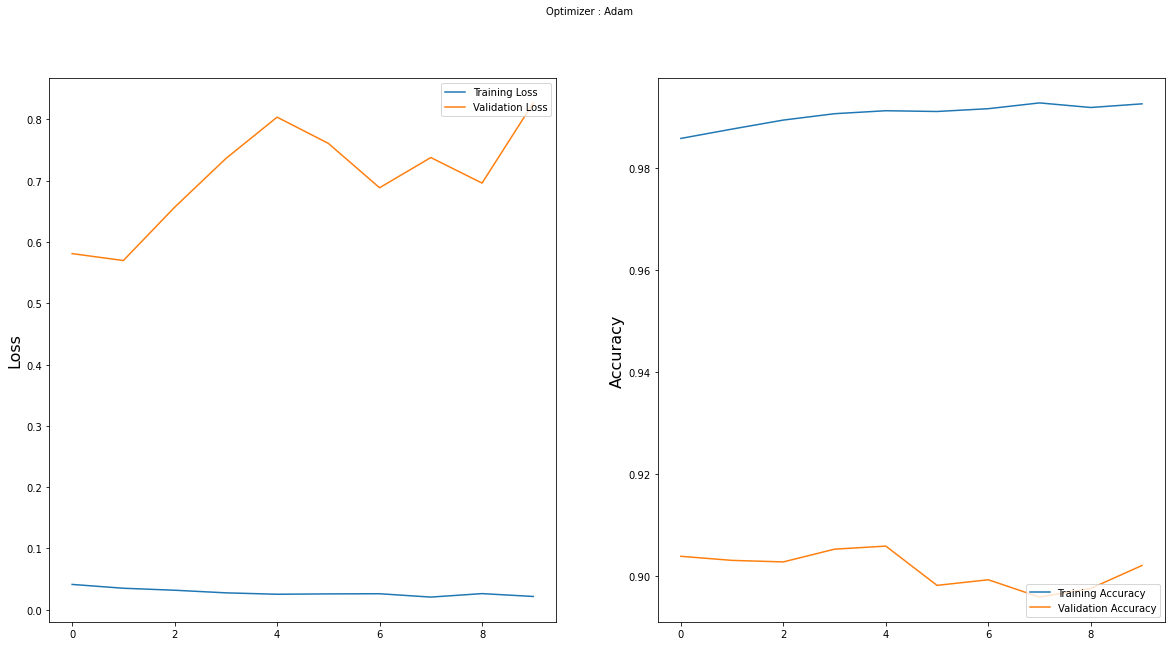

In [23]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [24]:
#ImageDataGenerator declaration 
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

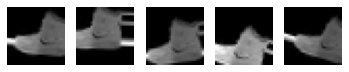

In [25]:
from matplotlib import pyplot as plt
gen = img_generator.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [26]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())


#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Flatten the output
model2.add(tf.keras.layers.Flatten())

#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0

### Run the above model using fit_generator()

In [29]:
history2 = model2.fit_generator(img_generator.flow(x_train, y_train, batch_size=32),
                    epochs=30,
                    verbose=1,
                    callbacks=callback,
                    validation_data=(x_test,y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.8925 - accuracy: 0.6715 - val_loss: 0.6515 - val_accuracy: 0.7442
Epoch 2/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6876 - accuracy: 0.7421 - val_loss: 0.5841 - val_accuracy: 0.7849
Epoch 3/30
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6229 - accuracy: 0.7663 - val_loss: 0.5387 - val_accuracy: 0.8095
Epoch 4/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5844 - accuracy: 0.7817 - val_loss: 0.4903 - val_accuracy: 0.8123
Epoch 5/30
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5521 - accuracy: 0.7944 - val_loss: 0.4897 - val_accuracy: 0.8211
Epoch 6/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5306 - accuracy: 0.8000 - val_loss: 0.4294 - val_accuracy: 0.8380
Epoch 7/30
1875/1875 [==========================

###  Report the final train and validation accuracy

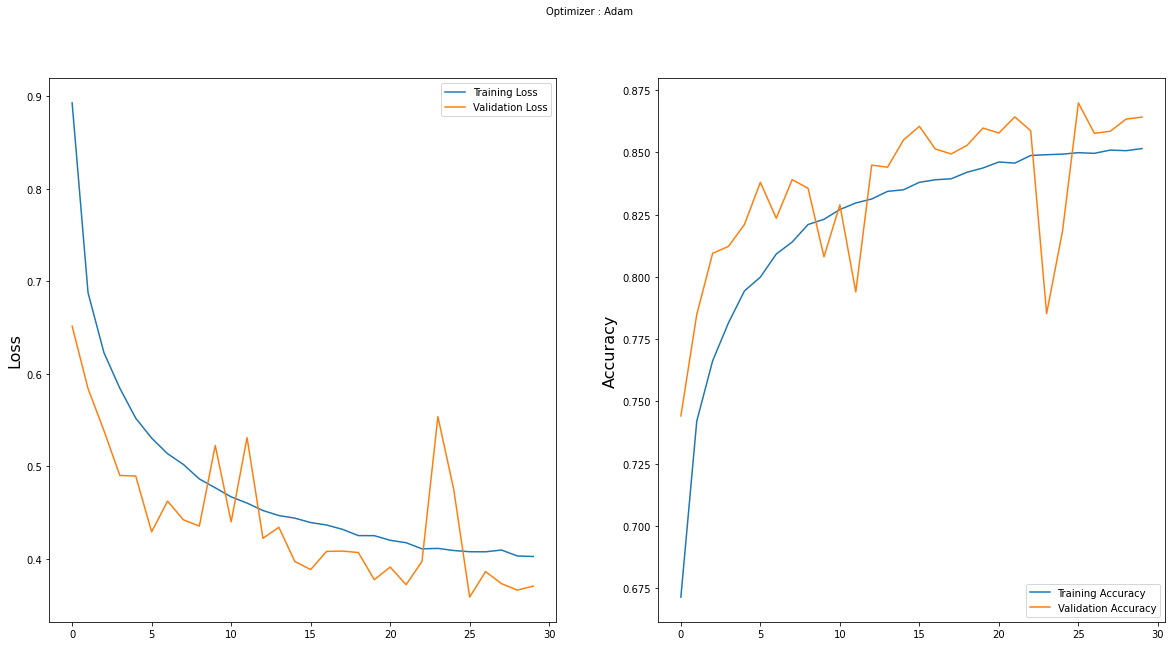

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
print(history.history)
print(history1.history)
print(history2.history)

{'loss': [0.4198013246059418, 0.25377556681632996, 0.19445310533046722, 0.15153324604034424, 0.12123867869377136, 0.09404047578573227, 0.07688084989786148, 0.057708896696567535, 0.05191398411989212, 0.04355201870203018], 'accuracy': [0.8566499948501587, 0.9058499932289124, 0.9284666776657104, 0.9443833231925964, 0.9563833475112915, 0.9662500023841858, 0.9726666808128357, 0.9788833260536194, 0.9815833568572998, 0.9847333431243896], 'val_loss': [0.3333311080932617, 0.30612656474113464, 0.3017843961715698, 0.3367897570133209, 0.3640604317188263, 0.3795468211174011, 0.42657017707824707, 0.4824909567832947, 0.5450251698493958, 0.6169309616088867], 'val_accuracy': [0.880299985408783, 0.8934000134468079, 0.8988000154495239, 0.9031000137329102, 0.9002000093460083, 0.8956999778747559, 0.8986999988555908, 0.8981999754905701, 0.8980000019073486, 0.9009000062942505]}
{'loss': [0.04131726175546646, 0.03506796061992645, 0.03183041140437126, 0.027563704177737236, 0.02527594566345215, 0.02585026808083

In [94]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.3709 - accuracy: 0.8642


[0.3708592653274536, 0.8641999959945679]

In [38]:
x_test.shape

(10000, 28, 28)

In [37]:
import numpy as np
x_test =  np.squeeze(x_test)

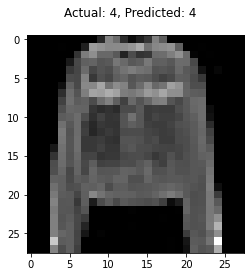

In [42]:
img_num = np.random.randint(0, x_test.shape[0])

#Prediction
prediction = model2.predict(np.expand_dims(x_test[img_num], axis=0))

#class with the highest probability 
predicted_class = np.argmax(prediction[0])

#Show results
plt.imshow(x_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Actual: ' + str(np.argmax(y_test[img_num])) + ', Predicted: ' + str(predicted_class))
plt.show()

## **DATA AUGMENTATION ON CIFAR10 DATASET**


One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [43]:
import tensorflow as tf

### **Load CIFAR10 dataset**

In [57]:
#Download the data
(trainX, trainY), (testX,testY) = tf.keras.datasets.cifar10.load_data()


In [58]:
trainX.shape

(50000, 32, 32, 3)

In [59]:
trainY.shape

(50000, 1)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [60]:
#ImageDataGenerator declaration 
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,)

### **Prepare/fit the generator.**

In [66]:
data_gen.fit(trainX)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

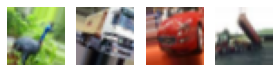

In [91]:
gen = data_gen.flow(trainX[0:10], batch_size=1)
for i in range(1, 5):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype(np.uint8), cmap='gray')
    plt.plot()
plt.show()